$$\textit{Data Mining Assignment 1}$$

Submitted By: 
**Mahak Kalsi,
27 October 2017**

Python 3 along with Jupyter Notebook is installed on my system.All the neccessary packages are imported required for my dataset.
Here the data on which i am working is **Human Resources Analytics** in which I have analyzed HR Data of left & stayed employees.






There are several factors affecting the employees and each of them is effecting the decision of leaving or not leaving the company.

The chosen Dataset is simulated

Lets start analyzing the HR dataset:

## Importing Libraries

Below are the neccessary libraries imported required for this dataset.

In [243]:
import numpy as np #to read the file
import pandas as pd #for numerical computations
import matplotlib.pyplot as plt #Plotting library

#For various classification models
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import seaborn as sns #Python visualization library
%matplotlib inline 


## <span style="color:blue">**Loading the Dataset and Preprocessing**</span>

**Reading the Data**

The dataset is loaded and first 5 rows are printed to see how our dataset looks like:

In [4]:
# Importing the dataset using pandas library
dataset = pd.read_csv("C:/Users/mahak/Downloads/Datamining/HR_comma_sep.csv")
#prints first 5 rows
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now , We check for the **basic info of the dataset** like datatype,null/not-null,memory usage,total columns or features.

In [9]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


There are **14999 employee observations and 10 features**.



**"left" is the target**, not feature.

**Check For The Missing Values**

On checking,**No missing values are present in the dataset.**

In [10]:
#lets see if there are any more columns with missing values 
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Now,I have **renamed** few columns to make the dataset more understandable.Sales seems to be as a column of the dataset,so I have renamed **sales as department** which makes us easy to check for the different departments in which employees have worked.

In [7]:
#Renaming of dataset
dataset=dataset.rename(columns={'sales':'department'})
dataset=dataset.rename(columns={'average_montly_hours':'average_monthly_hours'})
dataset=dataset.rename(columns={'number_project':'number_of_projects'})

Below shows unique values of the column department.

In [8]:
dataset.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In our dataset, we have two string variables,**department and salary** . Some packages are not able to deal with string variables.So, we need to convert string to numeric.

In [248]:
# Convert string to numeric
dept_dummies=pd.get_dummies(dataset.department)
dept_dummies.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [249]:
# Concatating the above formatted data with the real dataset
dept_concat=pd.concat([dataset,dept_dummies],axis=1)
dept_concat.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0


The department columns are converted to numeric variables, then joined with the data set.

Now, the column department is dropped as we dont need it in our dataset now.

In [11]:
dept_concat.drop('department', 1).head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


**Similarly, we convert another string variable : salary to numeric.**

In [12]:
dept_concat.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [13]:
dept_concat.salary.replace({'low':1,'medium':2,'high':3},inplace=True)

In [14]:
df=dept_concat.drop('department', 1)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


## <span style="color:blue"> **Visualization** </span>

Let us represent our dataset using several visualisation techniques.


##     1. Heatmap showing the correlation between the parameters:

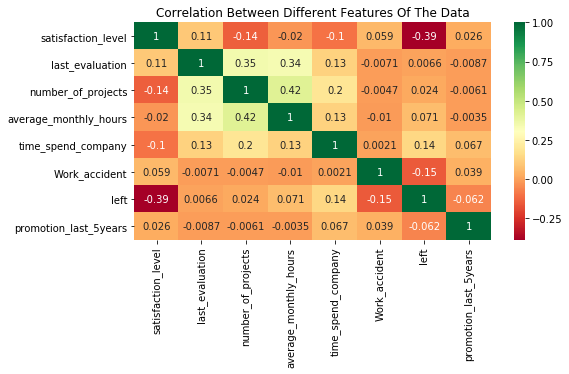

In [181]:
# Heatmap representation

fig = plt.figure(figsize=(8,4))
corr = dataset.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn',xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title('Correlation Between Different Features Of The Data')
plt.show()

1. A negative correlation of -0.39 exists between satisfaction level of the employees and employees leaving from the company.So, I can say that people tend to leave a company more when they are less satisfied.

2. A high positive correlation of 0.42 between average_monthly_hours and number_of_projects which employees have done while working in the company. 

3. There is a high corelation between average_monthly_hours,number_of_projects and last_evaluation. So, the employees who spent more hours and did more projects were evaluated highly.


## 2. Countplot Representation

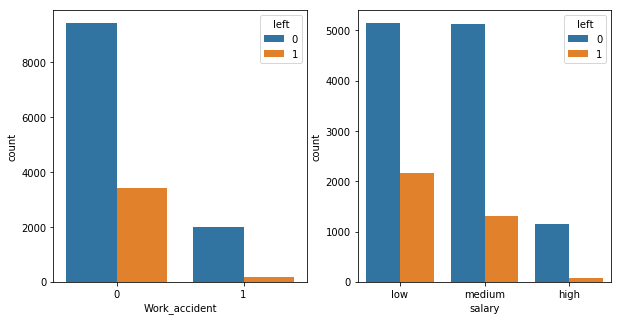

In [195]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Work_accident',data=dataset,hue='left',ax=ax[0]);
sns.countplot(data=dataset, x ='salary', hue= 'left' ,orient='v',ax=ax[1])

Employees who have work accidents stayed in the company.Well, we can't consider this parameter as important one.

Employees who were given low salary tends to leave the company more likely.Salary is a important feature to decide whether the employee will stay or not.

## 3. lmplot Representation

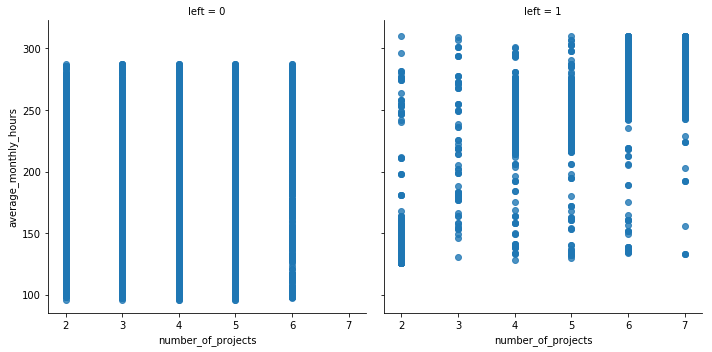

In [242]:
sns.lmplot(x='number_of_projects',y='average_monthly_hours',data=dataset,col='left',fit_reg=False,sharey=True);


1. Employees with more number of projects which is 7 tends to leave the company.
2. Employees with less number of projects are less likely to leave the company.



## 4. Boxplot Representation


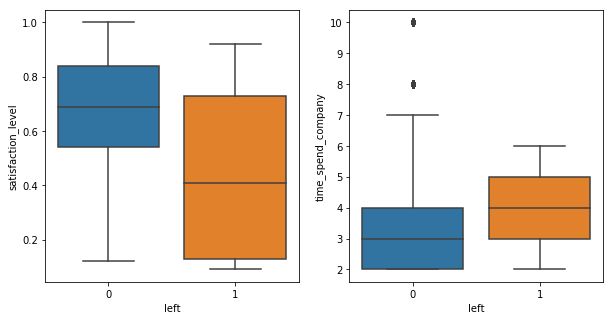

In [127]:
fig1,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.boxplot(x="left", y="satisfaction_level", data=dataset,ax=axes[0])
sns.boxplot(x="left", y="time_spend_company", data=dataset,ax=axes[1])
plt.show()



1. The employees who have low median value of satisfaction left the company.
2. The employees who have low median value for time_spend_company did not leave the company.

## 5. Factorplot Representation

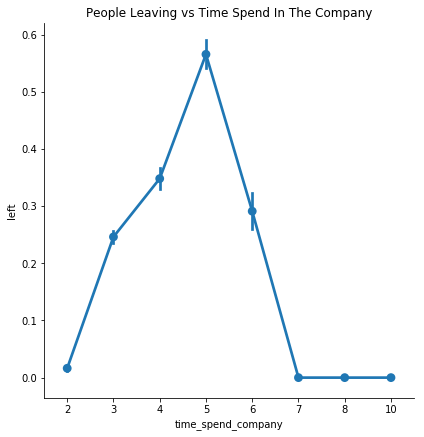

In [241]:
sns.factorplot(x= 'time_spend_company', y = 'left', data = dataset, size = 6)
plt.title('People Leaving vs Time Spend In The Company')

1. Employees who have spend 6 years or more tends to stay in the company.
2. Employees who have spend 2 years exactly in the company are less likely to leave the company.
3. Employees who have spend 3 years to 6 years in the company tends to leave the company more. (Maybe those employees got offers from other companies)
4. Employees who have spend 5 years in the company are more likely to leave the company.
  

## <span style="color:blue"> **Classification Models** </span>

Lets apply three classification model and compare the accuracy of each to check which model is best.

Below are the models I have used:
1. Decision Tree
2. Artifical Neural Network
3. Support Vector Machines

In scikit-learn a random split into training and test sets can be quickly computed with the **train_test_split** helper function. 

In [15]:
train, test = train_test_split(df, test_size=0.2)

In [255]:
len(train)

11999

In [256]:
len(test)

3000

**1. Decision Tree Model**

In [253]:
#Building Decision tree model 

data_DTC=DecisionTreeClassifier()
data_DTC.fit(train.drop("left",axis=1),train["left"])
prediction_DTC = tree_model.predict(test.drop("left",axis=1))
correct_DTC = test ["left"]
print("Accuracy ", accuracy_score(np.array(correct_DTC),prediction_DTC))

Accuracy  0.981333333333


**The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset**

In [257]:
# Crossvalidating the model. 
scores_DTC = cross_val_score(estimator= data_DTC,    # Model which you want to test
                X= train.drop("left",axis=1),  
                y = train["left"],                  # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                             # Cross validation folds(k number of folds)

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores_DTC.mean())

Accuracy per fold: 
[ 0.97668609  0.98001665  0.96919234  0.97002498  0.98083333  0.97247706
  0.97748123  0.98415346  0.97914929  0.97748123]
Average accuracy:  0.976000401505


**2. Artifical Neural Network Model**

In [169]:
#Artifical Neural Networks Model

data_ANN=MLPClassifier()
data_ANN.fit(train.drop("left",axis=1),train["left"])
prediction_ANN = data_ANN.predict(test.drop("left",axis=1))
correct_ANN = test ["left"]
print("Accuracy ", accuracy_score(np.array(correct_ANN),prediction_ANN))



Accuracy  0.893333333333


In [172]:
# Crossvalidating the Neural model. 
scores_ANN = cross_val_score(estimator= data_ANN,     # Model which you want to test
                X= train.drop("left",axis=1),  
                y = train["left"],                  # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds(k number of folds)

print("Accuracy per fold: ")
print(scores_ANN)
print("Average accuracy: ", scores_ANN.mean())

Accuracy per fold: 
[ 0.9092423   0.88676103  0.7743547   0.9009159   0.765       0.90909091
  0.89908257  0.89074229  0.91743119  0.89824854]
Average accuracy:  0.875086943463


**3. Support Vector Machines Model**

In [18]:
#SVM
data_svm = SVC(kernel='linear',random_state=0)
data_svm.fit(train.drop("left",axis=1),train["left"])
prediction_svm = data_svm.predict(test.drop("left",axis=1))
correct_svm = test ["left"]
print("Accuracy ", accuracy_score(np.array(correct_svm),prediction_svm))

Accuracy  0.778


In [32]:
# Crossvalidating the model. 
scores_svm = cross_val_score(estimator= data_svm,     # Model to test
                X= train.drop("left",axis=1),  
                y = train["left"],                  # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores_svm)
print("Average accuracy: ", scores_svm.mean())

Accuracy per fold: 
[ 0.78101582  0.76935887  0.78434638  0.77935054  0.77166667  0.7823186
  0.77564637  0.77814846  0.78648874  0.77481234]
Average accuracy:  0.778315278575


**From the above calculated accuracy of different models,we can determine which classification model performs better than another.**


**Decision Tree:**
1. Accuracy of Decision Tree Model :  $0.981333333333$ 
2. Average accuracy of Decision Tree Model using 10-fold cross validation :  $0.976000401505$

**Artifical Neural Network:**
1. Accuracy of Artifical Neural Network :  $0.893333333333$
2. Average accuracy of Artifical Neural Network using 10-fold cross validation :  $0.875086943463$

**Support Vector Machines(SVM):**
1. Accuracy of Support Vector Machines :  $0.778$
2. Average accuracy of Support Vector Machines using 10-fold cross validation :  $0.778315278575$

Best Model is Decision Tree Model as the accuracy of this model is much better as compared to the other models accuracy.It seems like this model is able to predict employees who will stay or leave very well whereas other models have less accuracy so these models wont be able to predict the target efficiently.

We can conclude that if a employee is not satisfied with his\her work , holding more number of projects and who were wroking for long hours are more likely to leave a company.